#### Zugriff aus python mit Hilfe von Pandas

In [2]:
import sqlite3 as sql
import pandas as pd
import torch
import numpy as np
import json
import matplotlib.pyplot as plt
import matplotlib
import dateutil
import datetime

Baue eine Verbindung zur meiner Datenbank auf:

In [6]:
conn = sql.connect('/Users/cm/home-assistant_v2.db')

### Die Daten aus der SQL mit Hilfe von Pandas auslesen

Tabellennamen ermitteln

In [7]:
table_names = pd.read_sql_query('select name from sqlite_master where type = "table"', conn)
table_names

,name
0,events
1,recorder_runs
2,schema_changes
3,states


Tabelle events einlesen

In [169]:
events = pd.read_sql_query('select * from events', conn)

In [171]:
events.iloc[26013,:]

event_id                                                       26014
event_type                                             state_changed
event_data         {"entity_id": "sensor.current_temperature_slee...
origin                                                         LOCAL
time_fired                                2019-04-01 22:03:34.137303
created                                   2019-04-01 22:03:40.911310
context_id                          e4ed82e9eafb4bc4adb0d2602f77b436
context_user_id                                                 None
Name: 26013, dtype: object

#### Tabelle recorder_runs einlesen

In [10]:
recorder_runs = pd.read_sql_query('select * from recorder_runs', conn)

In [185]:
recorder_runs.head()

,run_id,start,end,closed_incorrect,created
0,1,2019-03-12 22:48:20.868177,2019-03-12 22:53:18.617738,0,2019-03-12 22:48:23.980050
1,2,2019-03-12 22:53:30.678004,2019-03-18 22:46:20.636778,0,2019-03-12 22:53:33.324626
2,3,2019-03-18 22:46:33.514292,2019-03-24 21:43:44.047234,0,2019-03-18 22:46:36.190786
3,4,2019-03-24 21:50:36.016409,2019-03-24 22:02:31.807353,0,2019-03-24 21:50:39.080578
4,5,2019-03-24 22:02:53.786238,2019-03-24 22:12:00.639153,0,2019-03-24 22:02:56.422956


#### Tabelle schema_changes einlesen

In [186]:
schema_changes = pd.read_sql_query('select * from schema_changes', conn)

In [187]:
schema_changes.head()

,change_id,schema_version,changed
0,1,7,2019-03-12 22:48:23.927544


#### Tabelle states einlesen

In [188]:
states = pd.read_sql_query('select * from states', conn)

In [189]:
states.iloc[24922,:]

state_id                                                       24923
domain                                                       climate
entity_id                         climate.schlafzimmer_thermostat_sz
state                                                           auto
attributes         {"current_temperature": 0.0, "min_temp": 4.5, ...
event_id                                                       26082
last_changed                              2019-04-01 22:03:35.669212
last_updated                              2019-04-01 22:03:35.669212
created                                   2019-04-01 22:03:45.116334
context_id                          ef4839d887c84a4eb35a8a851a844ed5
context_user_id                                                 None
Name: 24922, dtype: object

### Vertiefung der Datensuche in der states Tabelle entity sensor

In [190]:
sensor = states[states['entity_id'].str.contains('sensor')]

In [191]:
sensor.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
3,4,sensor,sensor.yr_symbol,unknown,"{""attribution"": ""Weather forecast from met.no,...",65,2019-03-12 22:48:24.780412,2019-03-12 22:48:24.780412,2019-03-12 22:48:30.002484,87a4b6beb12c4b16abf6620ce9cc2742,None
5,6,sensor,sensor.yr_symbol,9,"{""attribution"": ""Weather forecast from met.no,...",71,2019-03-12 22:48:25.313220,2019-03-12 22:48:25.313220,2019-03-12 22:48:30.381933,8c19b12f6a8e484b9976a907e2094296,None
16,17,sensor,sensor.yr_symbol,unknown,"{""attribution"": ""Weather forecast from met.no,...",173,2019-03-12 22:53:33.992815,2019-03-12 22:53:33.992815,2019-03-12 22:53:39.532780,4d88230b6eef4086a154c69c7a319cce,None
19,20,sensor,sensor.yr_symbol,9,"{""attribution"": ""Weather forecast from met.no,...",178,2019-03-12 22:53:34.525612,2019-03-12 22:53:34.525612,2019-03-12 22:53:39.797005,281c3a68d99244bd98e838059f069252,None
143,144,sensor,sensor.yr_symbol,46,"{""attribution"": ""Weather forecast from met.no,...",345,2019-03-13 00:31:00.071899,2019-03-13 00:31:00.071899,2019-03-13 00:31:00.079859,31ce194c72d846ea8caa7c99f0f3ceab,None


In [192]:
state_sensor_living_room  = sensor[sensor['entity_id'].str.contains('living')]
state_sensor_living_room

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
20664,20665,sensor,sensor.current_temperature_living_room,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21140,2019-03-24 22:02:58.081555,2019-03-24 22:02:58.081555,2019-03-24 22:03:04.747438,bda6c210eb724ecca1f1787871cbd7a7,None
20682,20683,sensor,sensor.current_temperature_living_room,18.9,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21190,2019-03-24 22:02:59.422376,2019-03-24 22:02:59.422376,2019-03-24 22:03:08.259427,ddc9c611ec174046b0a125e50303a38c,None
20699,20700,sensor,sensor.current_temperature_living_room,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21275,2019-03-24 22:12:27.035515,2019-03-24 22:12:27.035515,2019-03-24 22:12:32.046845,4f87dbcdacfe4fac9881cca68000be58,None
20730,20731,sensor,sensor.current_temperature_living_room,18.9,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21339,2019-03-24 22:12:28.236272,2019-03-24 22:12:28.236272,2019-03-24 22:12:35.825178,54ea9c160be34d52ad5494d446838890,None
20736,20737,sensor,sensor.set_temperature_living_room,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21411,2019-03-24 22:21:42.993135,2019-03-24 22:21:42.993135,2019-03-24 22:21:47.744942,99adce0dcd80401381bd255bceb8f2d6,None
20742,20743,sensor,sensor.current_temperature_living_room,unknown,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21417,2019-03-24 22:21:42.997110,2019-03-24 22:21:42.997110,2019-03-24 22:21:48.148605,2d81ac0323c64b48bee80461e6488005,None
20772,20773,sensor,sensor.set_temperature_living_room,17.0,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21479,2019-03-24 22:21:44.159600,2019-03-24 22:21:44.159600,2019-03-24 22:21:51.850026,696c34ca9be54012954910a173a61eac,None
20778,20779,sensor,sensor.current_temperature_living_room,18.9,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21485,2019-03-24 22:21:44.165891,2019-03-24 22:21:44.165891,2019-03-24 22:21:52.256494,699c91efc6df49d8b7810d428cb3fb89,None
20793,20794,sensor,sensor.current_temperature_living_room,18.7,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21501,2019-03-24 22:41:07.754218,2019-03-24 22:41:07.754218,2019-03-24 22:41:07.956618,efe2a1bde2574fd2a5cfa952d534d59a,None
20797,20798,sensor,sensor.current_temperature_living_room,18.6,"{""unit_of_measurement"": ""\u00b0C"", ""friendly_n...",21505,2019-03-24 22:57:20.683716,2019-03-24 22:57:20.683716,2019-03-24 22:57:20.700652,1a4d8383d0194849a83bdeec6232eeac,None


In [193]:
end_date = np.datetime64('2019-03-29 23:59:00')
start_date = np.datetime64('2019-03-26 00:00:00')

In [194]:
state_sensor_living_room_clean = state_sensor_living_room.loc[:,('entity_id','state','last_updated')]
state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('temperature')]
#state_sensor_living_room_clean = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('wt')]
living_room_wt_tcurr = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('current')]
living_room_wt_tset = state_sensor_living_room_clean[state_sensor_living_room_clean['entity_id'].str.contains('set')]


In [195]:
living_room_wt_tcurr['last_updated'] = living_room_wt_tcurr['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [196]:
living_room_wt_tset['last_updated'] = living_room_wt_tset['last_updated'].map(lambda x: dateutil.parser.parse(x))

/Users/cm/anaconda3/envs/week_program/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [197]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr['state'] = living_room_wt_tcurr['state'].astype(float)

In [198]:
living_room_wt_tset = living_room_wt_tset[(living_room_wt_tset['last_updated'] > start_date) & (living_room_wt_tset['last_updated'] < end_date)]
living_room_wt_tset['state'] = living_room_wt_tset['state'].astype(float)
living_room_wt_tset

,entity_id,state,last_updated
21460,sensor.set_temperature_living_room,21.0,2019-03-26 05:02:37.729254
21464,sensor.set_temperature_living_room,19.0,2019-03-26 05:07:42.741597
21527,sensor.set_temperature_living_room,17.0,2019-03-26 08:00:30.756457
21581,sensor.set_temperature_living_room,14.0,2019-03-26 10:27:55.729030
21596,sensor.set_temperature_living_room,17.0,2019-03-26 10:48:15.753819
21699,sensor.set_temperature_living_room,21.0,2019-03-26 16:03:24.731149
21780,sensor.set_temperature_living_room,20.0,2019-03-26 19:41:56.756870
21851,sensor.set_temperature_living_room,17.0,2019-03-26 22:04:14.717465
21998,sensor.set_temperature_living_room,21.0,2019-03-27 05:01:00.726418
22006,sensor.set_temperature_living_room,19.0,2019-03-27 05:11:10.672614


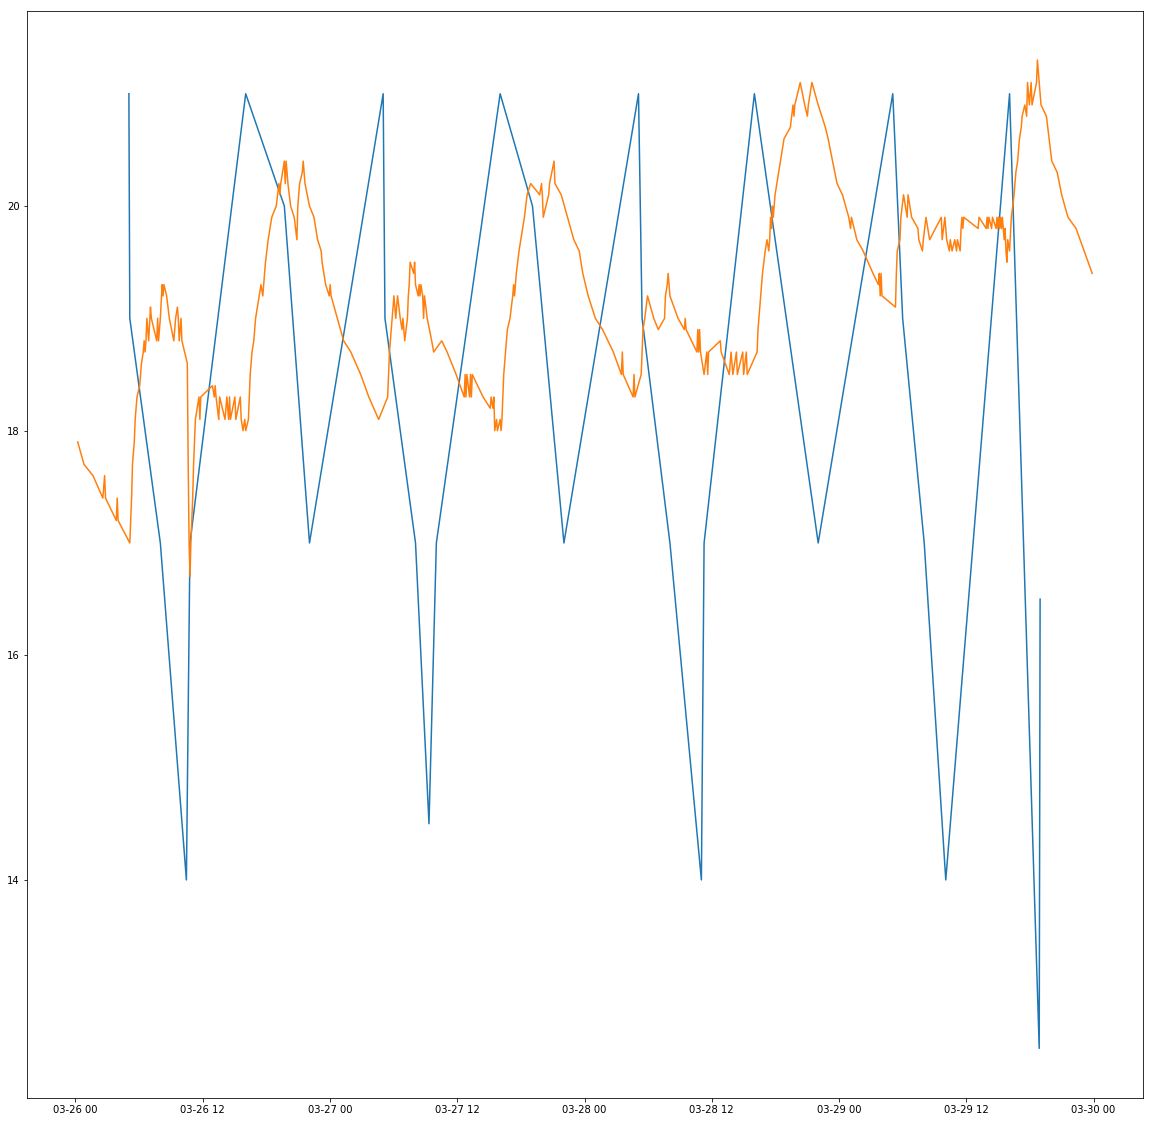

In [199]:
dates = matplotlib.dates.date2num(living_room_wt_tcurr['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
dates2 = matplotlib.dates.date2num(living_room_wt_tset['last_updated'])
matplotlib.pyplot.plot_date(dates2, living_room_wt_tset['state'], '-')
matplotlib.pyplot.plot_date(dates, living_room_wt_tcurr['state'], '-');

In [200]:
end_date = np.datetime64('2019-04-01 23:59:00')
start_date = np.datetime64('2019-03-12 00:00:00')

In [201]:
pd.read_sql_query('SELECT entity_id, COUNT(*) as count FROM states GROUP BY entity_id', conn).head()

,entity_id,count
0,binary_sensor.kuche_fensterkontakt_kuche,1
1,binary_sensor.remote_ui,7
2,binary_sensor.schlafzimmer_fensterkontakt_sz,1
3,binary_sensor.wohnzimmer_fensterkontakt_wz1,1
4,binary_sensor.wohnzimmer_fensterkontakt_wz2,1


In [202]:
living_room_wt_tcurr = living_room_wt_tcurr[(living_room_wt_tcurr['last_updated'] > start_date) & (living_room_wt_tcurr['last_updated'] < end_date)]
living_room_wt_tcurr = living_room_wt_tcurr.sort_values(by=['state'])

### Vertiefung der Datensuche in der states Tabelle entity climate

In [203]:
climate = states[states['entity_id'].str.contains('climate')]

In [204]:
climate.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
20,21,climate,climate.schlafzimmer_thermostat_sz,auto,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",195,2019-03-12 22:53:36.221414,2019-03-12 22:53:36.221414,2019-03-12 22:53:40.634904,a55985718e3a4fe8ab6b3c7626444c80,None
21,22,climate,climate.wohnzimmer_thermostat_2_wz,manual,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",196,2019-03-12 22:53:36.222760,2019-03-12 22:53:36.222760,2019-03-12 22:53:40.692896,b7d90dc3dc95461c8fea88725ecc6d40,None
22,23,climate,climate.wohnzimmer_thermostat_1_wz,manual,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",197,2019-03-12 22:53:36.224730,2019-03-12 22:53:36.224730,2019-03-12 22:53:40.751787,9d05a9aa3202426087e1e0779dc388f2,None
23,24,climate,climate.schlafzimmer_wandthermostat_sz,auto,"{""current_temperature"": 17.4, ""min_temp"": 4.5,...",198,2019-03-12 22:53:36.227011,2019-03-12 22:53:36.227011,2019-03-12 22:53:40.811380,133d0ac3812b4ade882ead5785287866,None
24,25,climate,climate.kinderzimmer_thermostat_kiz,manual,"{""current_temperature"": 17.2, ""min_temp"": 4.5,...",199,2019-03-12 22:53:36.229126,2019-03-12 22:53:36.229126,2019-03-12 22:53:40.866529,aae3a3107bb248e9bce236382067487e,None


In [205]:
state_climate_living_room  = climate[climate['entity_id'].str.contains('wohn')]
state_climate_living_room.head()

,state_id,domain,entity_id,state,attributes,event_id,last_changed,last_updated,created,context_id,context_user_id
21,22,climate,climate.wohnzimmer_thermostat_2_wz,manual,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",196,2019-03-12 22:53:36.222760,2019-03-12 22:53:36.222760,2019-03-12 22:53:40.692896,b7d90dc3dc95461c8fea88725ecc6d40,None
22,23,climate,climate.wohnzimmer_thermostat_1_wz,manual,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",197,2019-03-12 22:53:36.224730,2019-03-12 22:53:36.224730,2019-03-12 22:53:40.751787,9d05a9aa3202426087e1e0779dc388f2,None
25,26,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",200,2019-03-12 22:53:36.230785,2019-03-12 22:53:36.230785,2019-03-12 22:53:40.927774,6775339966b74fd8be5a7969600ef5bd,None
43,44,climate,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.5, ""min_temp"": 4.5,...",245,2019-03-12 22:53:36.230785,2019-03-12 23:03:48.705436,2019-03-12 23:03:48.716222,18ccbd083d7b48a2a06e30812ea26a48,None
49,50,climate,climate.wohnzimmer_thermostat_2_wz,manual,"{""current_temperature"": 16.5, ""min_temp"": 4.5,...",251,2019-03-12 22:53:36.222760,2019-03-12 23:08:53.713406,2019-03-12 23:08:53.726510,93859e21c9f74e33ab4b99b1a5f642f9,None


In [206]:
state_climate_living_room = state_climate_living_room.loc[:,('entity_id','state','attributes','last_updated')]
state_climate_living_room.tail()

,entity_id,state,attributes,last_updated
20676,climate.wohnzimmer_thermostat_1_wz,auto,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",2019-03-24 22:02:59.400915
20680,climate.wohnzimmer_wandthermostat_wz,auto,"{""current_temperature"": 18.9, ""min_temp"": 4.5,...",2019-03-24 22:02:59.407992
24925,climate.wohnzimmer_thermostat_1_wz,auto,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",2019-04-01 22:03:35.673333
24928,climate.wohnzimmer_thermostat_2_wz,auto,"{""current_temperature"": 0.0, ""min_temp"": 4.5, ...",2019-04-01 22:03:35.677588
24929,climate.wohnzimmer_wandthermostat_wz,auto,"{""current_temperature"": 20.4, ""min_temp"": 4.5,...",2019-04-01 22:03:35.678955


In [207]:
state_climate_living_room['last_updated'] = state_climate_living_room['last_updated'].map(lambda x: dateutil.parser.parse(x))

In [208]:
state_climate_living_room = state_climate_living_room[(state_climate_living_room['last_updated'] > start_date) & (state_climate_living_room['last_updated'] < end_date)]

In [209]:
current_temp = []
set_temp = []
for value in state_climate_living_room['attributes']:
    json_acceptable_string = value.replace("'", "\"")
    dict = json.loads(json_acceptable_string)
    current_temp.append(dict['current_temperature'])
    set_temp.append(dict['temperature'])

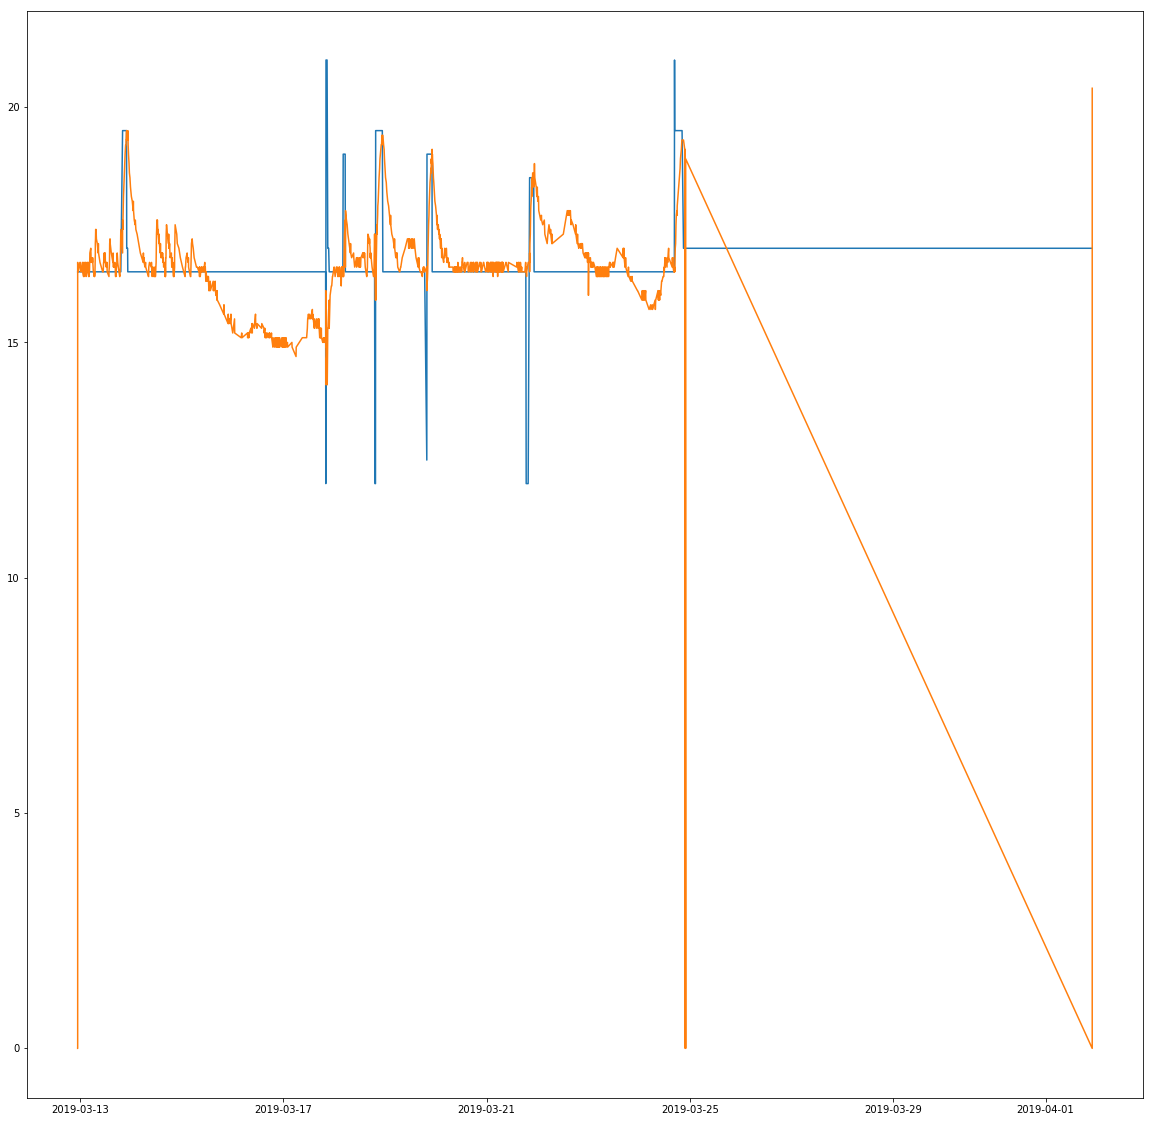

In [175]:
dates = matplotlib.dates.date2num(state_climate_living_room['last_updated'])
fig1 = matplotlib.pyplot.figure(figsize=[20,20])
matplotlib.pyplot.plot_date(dates, set_temp, '-')
matplotlib.pyplot.plot_date(dates, current_temp, '-');

In [182]:
pd.read_sql_query('select entity_id,state,attributes,last_updated from states where entity_id like "%climate%wohn%wand%"', conn)

,entity_id,state,attributes,last_updated
0,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-12 22:53:36.230785
1,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.5, ""min_temp"": 4.5,...",2019-03-12 23:03:48.705436
2,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-12 23:59:42.700498
3,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.5, ""min_temp"": 4.5,...",2019-03-13 00:20:02.727446
4,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.7, ""min_temp"": 4.5,...",2019-03-13 01:10:52.727792
5,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.5, ""min_temp"": 4.5,...",2019-03-13 01:15:57.738437
6,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.4, ""min_temp"": 4.5,...",2019-03-13 01:41:22.684016
7,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.5, ""min_temp"": 4.5,...",2019-03-13 01:46:27.705475
8,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.4, ""min_temp"": 4.5,...",2019-03-13 01:56:37.704967
9,climate.wohnzimmer_wandthermostat_wz,manual,"{""current_temperature"": 16.5, ""min_temp"": 4.5,...",2019-03-13 02:01:42.728581
